In [6]:
import numpy as np
import math
import pandas as pd
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

The KKT condition of
$$
\begin{array}{rl}
\min & 4x_1+x_2\\
s.t. & x_1-x_2 \geq 3\\
     & 2x_1+x_2\geq -1\\
     &x_1,x_2\geq 0
\end{array}
$$
is given by $$
\begin{array}{l}
(Primal)\left\{
\begin{array}{l}
x_1-x_2-x_3=3\\
2x_1+x_2-x_4=-1\\
x_1,x_2,x_3,x_4\geq 0\\
\end{array}
\right.\\
(Dual)\left\{
\begin{array}{l}
y_1+2y_2+y_3 =4\\
-y_1+y_2+y_4 =1\\
y_1,y_2,y_3,y_4\geq 0\\
\end{array}
\right.\\
(CS)\left\{
\begin{array}{l}
{x_1=0\hbox{ or }y_3=0}\\
{x_2=0\hbox{ or }y_4=0}\\
{x_3=0\hbox{ or }y_1=0}\\
{x_4=0\hbox{ or }y_2=0}\\
\end{array}
\right.
\end{array}
$$

Then we obtain
$$
\begin{array}{|c|c||c|c|c|c||c|c|c|c|}
\hline
\hbox{P} & \hbox{D} &x_1 & x_2 & x_3 & x_4 & y_1 & y_2 & y_3 & y_4 \\ \hline
\times&      &  0  &  0   &  0   &  0   &    &     &     &     \\ \hline
\times&      &  0  &  0   &  0   &     &     &  0   &     &     \\
\times&      &  0  &  0   &     &  0   &  0   &     &     &     \\
\times&      &  0  &     &  0   &  0   &     &     &     &  0   \\
\times&      &    &  0   &  0   &  0   &     &     &  0   &     \\ \hline
      &\times&  0  &     &     &     &  0   &  0   &     &  0   \\
      &\times&    &  0   &     &     &  0   &  0   &  0   &     \\
      &\times&    &     &  0   &     &     &  0  &  0   &  0   \\
      &\times&    &     &     &  0   &  0  &     &  0   &  0   \\\hline
      &\times&    &     &     &     &  0   &  0   &  0   &  0   \\\hline
\end{array}
$$
Hence we consider the case 
$$
\begin{array}{|c|c||c|c|c|c||c|c|c|c|}
\hline
\hbox{P} & \hbox{D} &x_1 & x_2 & x_3 & x_4 & y_1 & y_2 & y_3 & y_4 \\ \hline
         &          &  0  &  0   &     &     &  0   &  0   &     &     \\
         &          &  0  &     &  0   &     &     &  0   &     &  0   \\
         &          &  0  &     &     &  0   &  0   &     &     &  0   \\
         &          &    &  0   &  0   &     &     &  0   &  0   &     \\
         &          &    &  0   &     &  0   &  0   &     &  0   &     \\
         &          &    &     &  0   &  0   &     &     &  0   &  0   \\ \hline
\end{array}
$$       

$$
\begin{array}{|c|c||c|c|c|c||c|c|c|c|}
\hline
\hbox{P} & \hbox{D} &x_1 & x_2 & x_3 & x_4 & y_1 & y_2 & y_3 & y_4 \\ \hline
\times   &          &  0  &  0   &  -3   &  1   &  0   &  0   &  4   &  1   \\
\times   & \times   &  0  &  -3   &  0   &  -2   &  -1   &  0   &  5   &  0   \\
\times   &          &  0  &  -1   &  -2   &  0   &  0   &  1  &  2   &  0   \\
         &          &  3  &  0   &  0   &  7   &  4   &  0   &  0   &  5   \\
\times   & \times   &  -1/2  &  0   &  -7/2   &  0   &  0   &  2   &  0   &  -1   \\
\times   &          &  2/3  &  -7/3   &  0   &  0   &  2/3   &  5/3   &  0   &  0   \\ \hline
\end{array}
$$   

In [7]:
A=np.array([[1,-1,-1,0],[2,1,0,-1]])
b=np.array([[3],[-1]])
c=np.array([[4],[1]])
BIndex=np.array([[3,4],[2,4],[2,3],[1,4],[1,3],[1,2]])
BBIndex=np.array([[3,4],[1,3],[2,3],[1,4],[2,4],[1,2]])
At=np.array([[1,2,1,0],[-1,-1,0,1]])
x=[]
for j in range(len(BIndex)):
    B=np.array(A[:,BIndex[j]-1])
    sol=np.linalg.inv(B).dot(b)
    x.append([0,0,0,0])
    for i in range(len(BIndex[j])):
        x[-1][BIndex[j][i]-1]=sol[i][0]        
y=[]
for j in range(len(BBIndex)):
    B=np.array(At[:,BBIndex[j]-1])
    sol=np.linalg.inv(B).dot(c)
    y.append([0,0,0,0])
    for i in range(len(BBIndex[j])):
        y[-1][BBIndex[j][i]-1]=sol[i][0]

In [8]:
No,x1,x2,x3,x4,y1,y2,y3,y4=[],[],[],[],[],[],[],[],[]
dataFormat="%.6f"
for l in range(len(BIndex)):
    No.append(l)
    x1.append(dataFormat % x[l][0])
    x2.append(dataFormat % x[l][1])
    x3.append(dataFormat % x[l][2])
    x4.append(dataFormat % x[l][3])
    y1.append(dataFormat % y[l][0])
    y2.append(dataFormat % y[l][1])
    y3.append(dataFormat % y[l][2])
    y4.append(dataFormat % y[l][3])
Table = {"l": No,"$x{1}$":x1,"$x{2}$":x2,"$x{3}$":x3,"$x{4}$":x4,
             "$y{1}$":y1,"$y{2}$":y2,"$y{3}$":y3,"$y{4}$":y4}
SelectedDF = pd.DataFrame(Table)
SelectedDF.sort_values(by = "l")

,l,$x{1}$,$x{2}$,$x{3}$,$x{4}$,$y{1}$,$y{2}$,$y{3}$,$y{4}$
0,0,0.000000,0.000000,-3.000000,1.000000,0.000000,0.000000,4.000000,1.000000
1,1,0.000000,-3.000000,0.000000,-2.000000,-1.000000,0.000000,5.000000,0.000000
2,2,0.000000,-1.000000,-2.000000,0.000000,0.000000,-1.000000,6.000000,0.000000
3,3,3.000000,0.000000,0.000000,7.000000,4.000000,0.000000,0.000000,5.000000
4,4,-0.500000,0.000000,-3.500000,0.000000,0.000000,2.000000,0.000000,3.000000
5,5,0.666667,-2.333333,0.000000,0.000000,-6.000000,5.000000,0.000000,0.000000


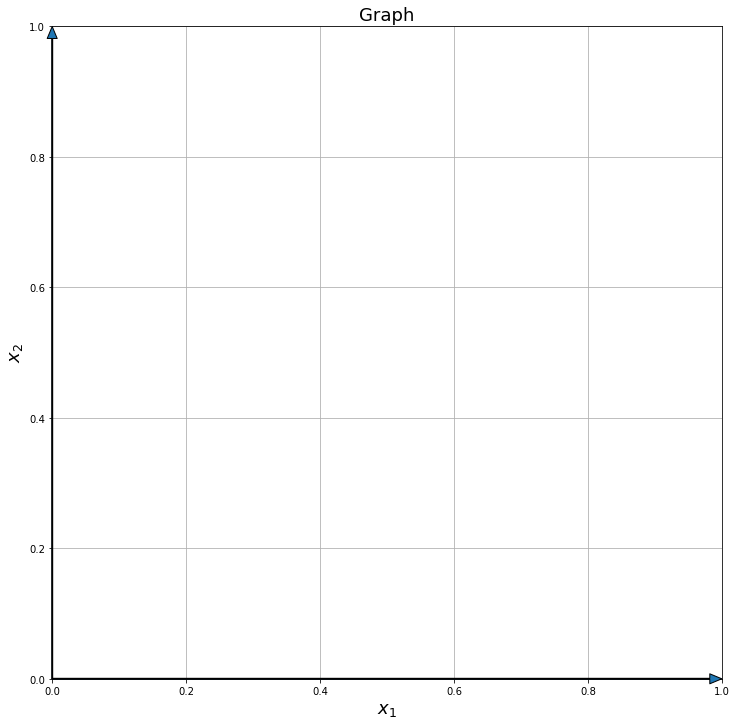

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12)) #圖片大小
ax.axhline(y=0, xmin=-4, xmax=4)#橫軸
ax.axvline(x=0, ymin=0, ymax=8)#縱軸
ax.annotate("", xy=(0, 1), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))#橫軸的箭頭
ax.annotate("", xy=(1, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))#縱軸的箭頭
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)
ax.grid()#格子點


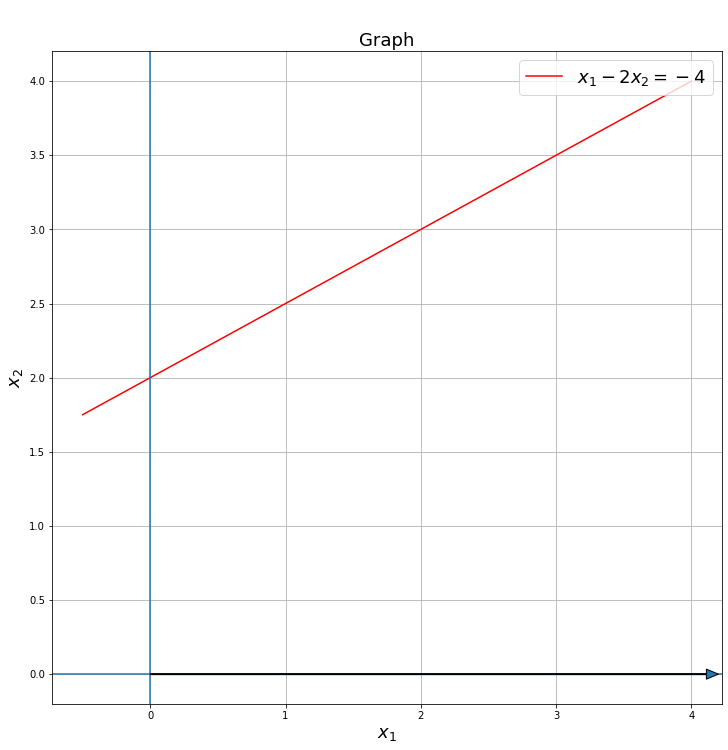

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))
x = np.linspace(-1/2,4,100) #-1/2到4 分一百個點
y = (x+4)/2
ax.plot(x, y, '-r', label='$x_1-2x_2 = -4$')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 4.5), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4.2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)
ax.legend(loc='upper right',fontsize=18)
ax.grid()

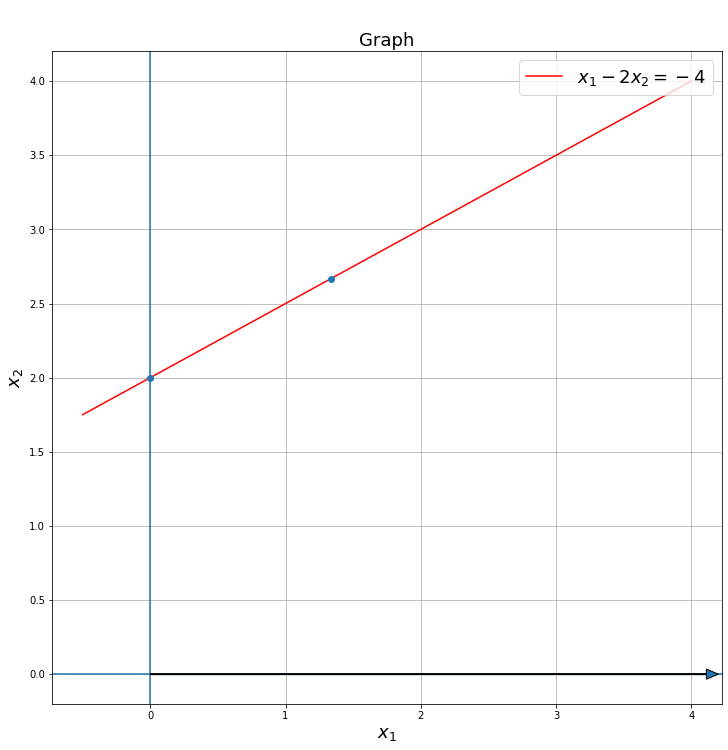

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
x = np.linspace(-1/2,4,100) #-1/2到4 分一百個點
y = (x+4)/2
ax.plot(x, y, '-r', label='$x_1-2x_2 = -4$')
ax.plot([0,4/3],[2,8/3],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 4.5), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4.2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)
ax.legend(loc='upper right',fontsize=18)
ax.grid()

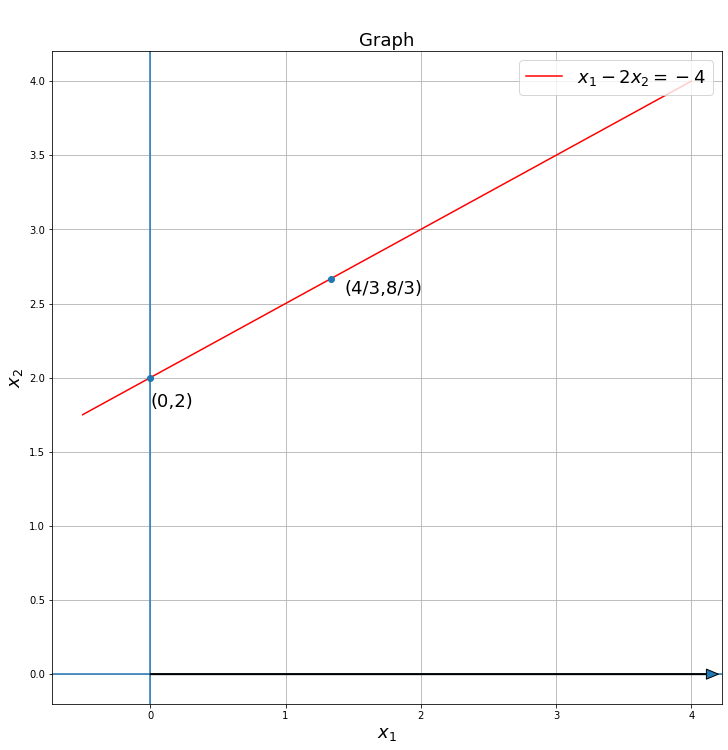

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
x = np.linspace(-1/2,4,100) #-1/2到4 分一百個點
y = (x+4)/2
ax.plot(x, y, '-r', label='$x_1-2x_2 = -4$')
ax.plot([0,4/3],[2,8/3],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 4.5), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4.2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)
ax.text(0,1.8,'(0,2)',fontsize=18)
ax.text(4/3+0.1,8/3-0.1,'(4/3,8/3)',fontsize=18)
ax.legend(loc='upper right',fontsize=18)
ax.grid()

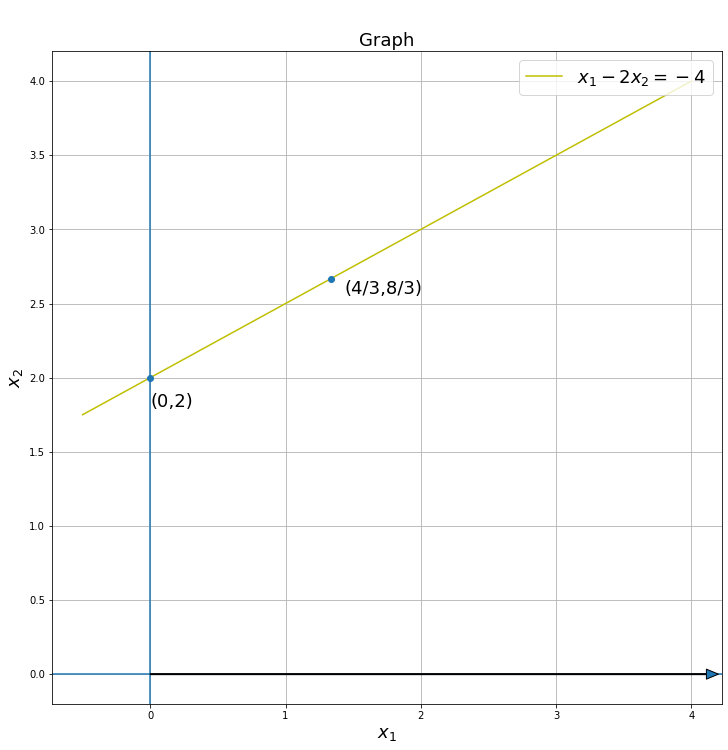

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
x = np.linspace(-1/2,4,100) #-1/2到4 分一百個點
z = (x+4)/2
ax.plot(x, y, '-y', label='$x_1-2x_2 = -4$') #改成黃色
ax.plot([0,4/3],[2,8/3],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 4.5), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4.2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)
ax.text(0,1.8,'(0,2)',fontsize=18)
ax.text(4/3+0.1,8/3-0.1,'(4/3,8/3)',fontsize=18)
ax.legend(loc='upper right',fontsize=18)
ax.grid()

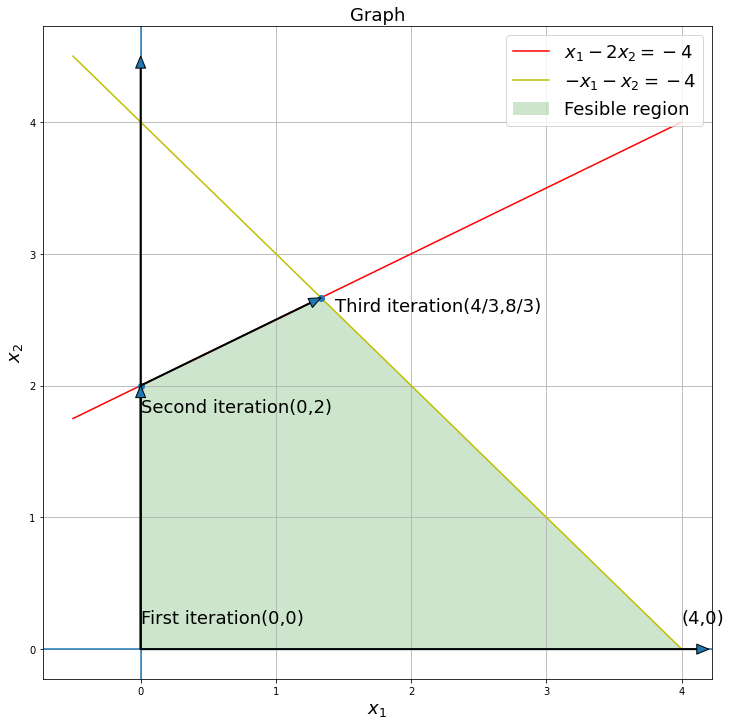

In [31]:
ax.plot([0,4/3],[2,8/3],'o')
ax.text(0,1.8,'(0,2)',fontsize=18)
ax.text(4/3+0.1,8/3-0.1,'(4/3,8/3)',fontsize=18)

fig, ax = plt.subplots(figsize=(12, 12))
x = np.linspace(-1/2,4,100)
y = (x+4)/2
z = -x+4
ax.plot(x, y, '-r', label='$x_1-2x_2 = -4$')
ax.plot(x, z, '-y', label='$-x_1-x_2 = -4$')
ax.plot([0,4/3],[2,8/3],'o')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 4.5), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4.2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)
ax.text(4,0.2,'(4,0)',fontsize=18)
ax.text(0,0.2,'First iteration(0,0)',fontsize=18)
ax.text(0,1.8,'Second iteration(0,2)',fontsize=18)
ax.text(4/3+0.1,8/3-0.1,'Third iteration(4/3,8/3)',fontsize=18)
ax.annotate("", xy=(0, 2), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4/3, 8/3), xytext=(0, 2),arrowprops=dict(width=1,headwidth=10))
min_y_z=[]
for i in range (len(y)):
    min_y_z.append(min([y[i],z[i]]))
min_y_z=np.array(min_y_z)
ax.fill_between(x,0,min_y_z,where=(x>=0),facecolor="green",alpha=0.2,label="Fesible region")
ax.legend(loc='upper right',fontsize=18)
ax.grid()
